# Challange 2: House Price

### Import thư viện:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 🧭 1. Mô tả tổng quan dữ liệu House Prices
# ============================================

In [10]:
# Đọc dữ liệu
df = pd.read_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data\\train.csv")   # Đặt đúng đường dẫn nếu cần

# 1️⃣ Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}\n")

# 2️⃣ Danh sách tên các cột
print("Tên các cột:")
print(df.columns.tolist(), "\n")

# 3️⃣ Tổng số giá trị thiếu mỗi cột
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Các cột có giá trị thiếu:")
print(missing_values)

# 4️⃣ (Tuỳ chọn) Tóm tắt dữ liệu tổng quan
print("\nTóm tắt dữ liệu:")
print(df.info())

Số dòng: 1460
Số cột: 81

Tên các cột:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorc

- Dữ liệu gồm 1460 dòng và 81 cột, Giá trị cột PoolQC , MiscFeature, Alley, Fence, MasVnrType và FireplaceQu có số lượng missing value tương đối lớn so với những cột dữ liệu còn lại

In [11]:
# 1️⃣ Phân loại biến
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Tổng số biến số (numeric): {len(numeric_cols)}")
print(f"Tổng số biến phân loại (categorical): {len(categorical_cols)}\n")

print("📊 Một số biến số đầu tiên:")
print(numeric_cols[:10], "\n")

print("🔤 Một số biến phân loại đầu tiên:")
print(categorical_cols[:10], "\n")

# 2️⃣ Tính tổng và tỷ lệ giá trị thiếu
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'MissingCount']
missing_data['MissingPercent'] = (missing_data['MissingCount'] / len(df)) * 100
missing_data = missing_data[missing_data['MissingCount'] > 0].sort_values(by='MissingPercent', ascending=False)

print("⚠️ Các cột có dữ liệu thiếu:")
print(missing_data)

Tổng số biến số (numeric): 38
Tổng số biến phân loại (categorical): 43

📊 Một số biến số đầu tiên:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'] 

🔤 Một số biến phân loại đầu tiên:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'] 

⚠️ Các cột có dữ liệu thiếu:
          Column  MissingCount  MissingPercent
72        PoolQC          1453       99.520548
74   MiscFeature          1406       96.301370
6          Alley          1369       93.767123
73         Fence          1179       80.753425
25    MasVnrType           872       59.726027
57   FireplaceQu           690       47.260274
3    LotFrontage           259       17.739726
58    GarageType            81        5.547945
59   GarageYrBlt            81        5.547945
60  GarageFinish            81        5.547945
63    GarageQual            81        5.547945
64    Ga

# ============================================
#  3. Phân tích tương quan với SalePrice
# ============================================

🔗 Tương quan giữa các biến số và SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.1

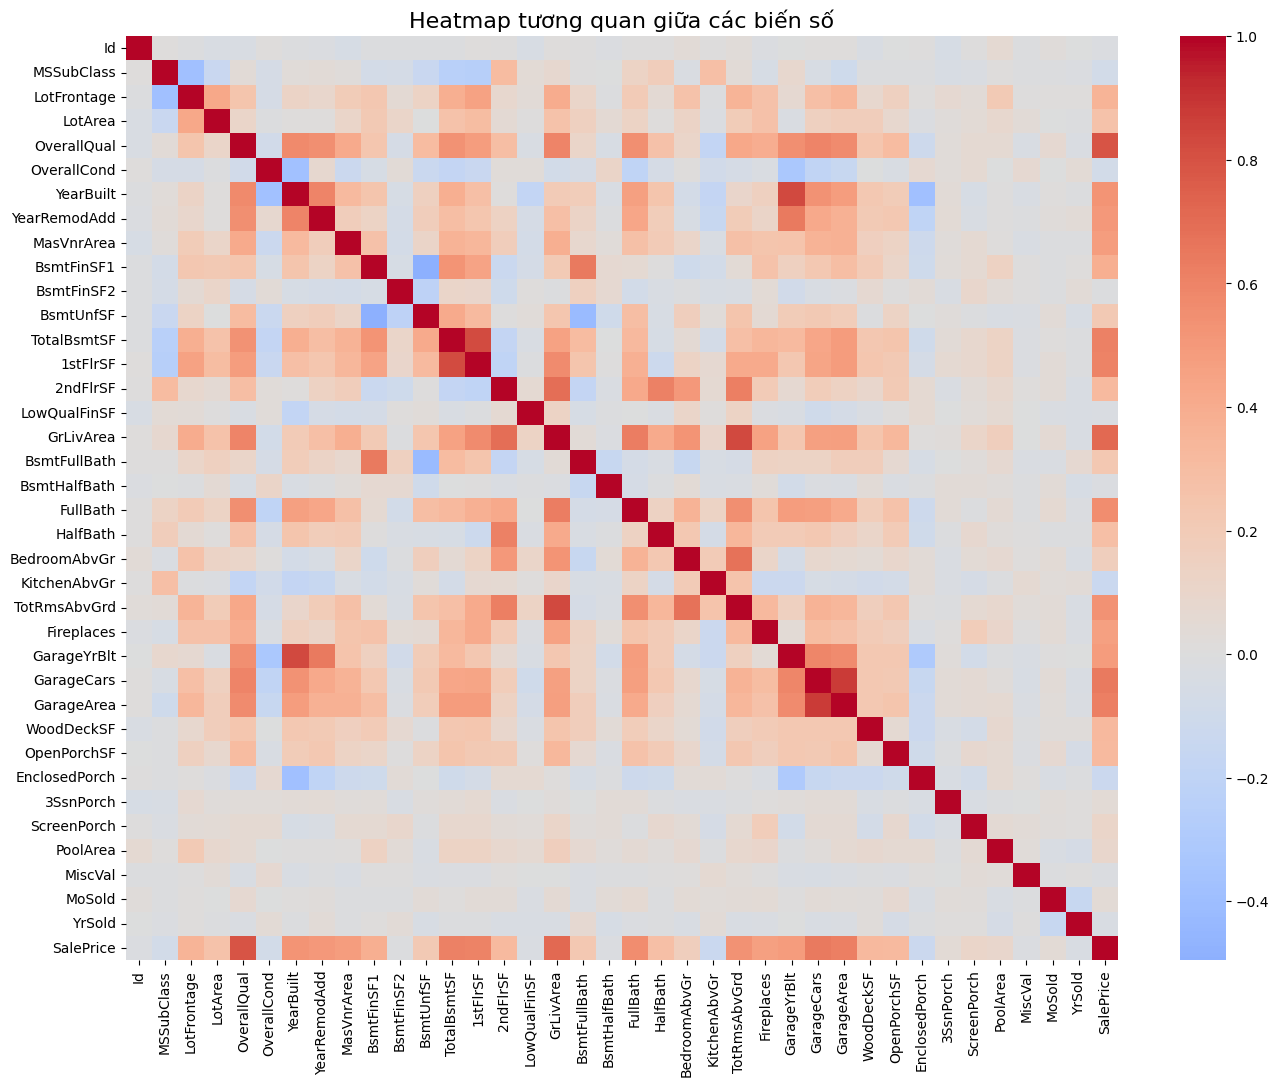

C:\Users\hienm\AppData\Local\Temp\ipykernel_21688\381641480.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


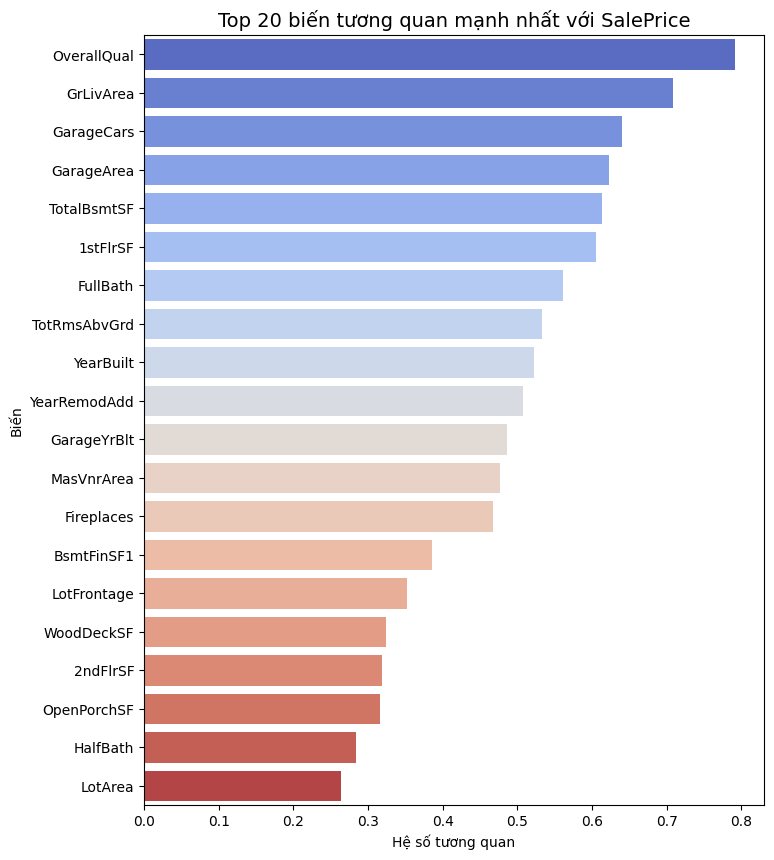

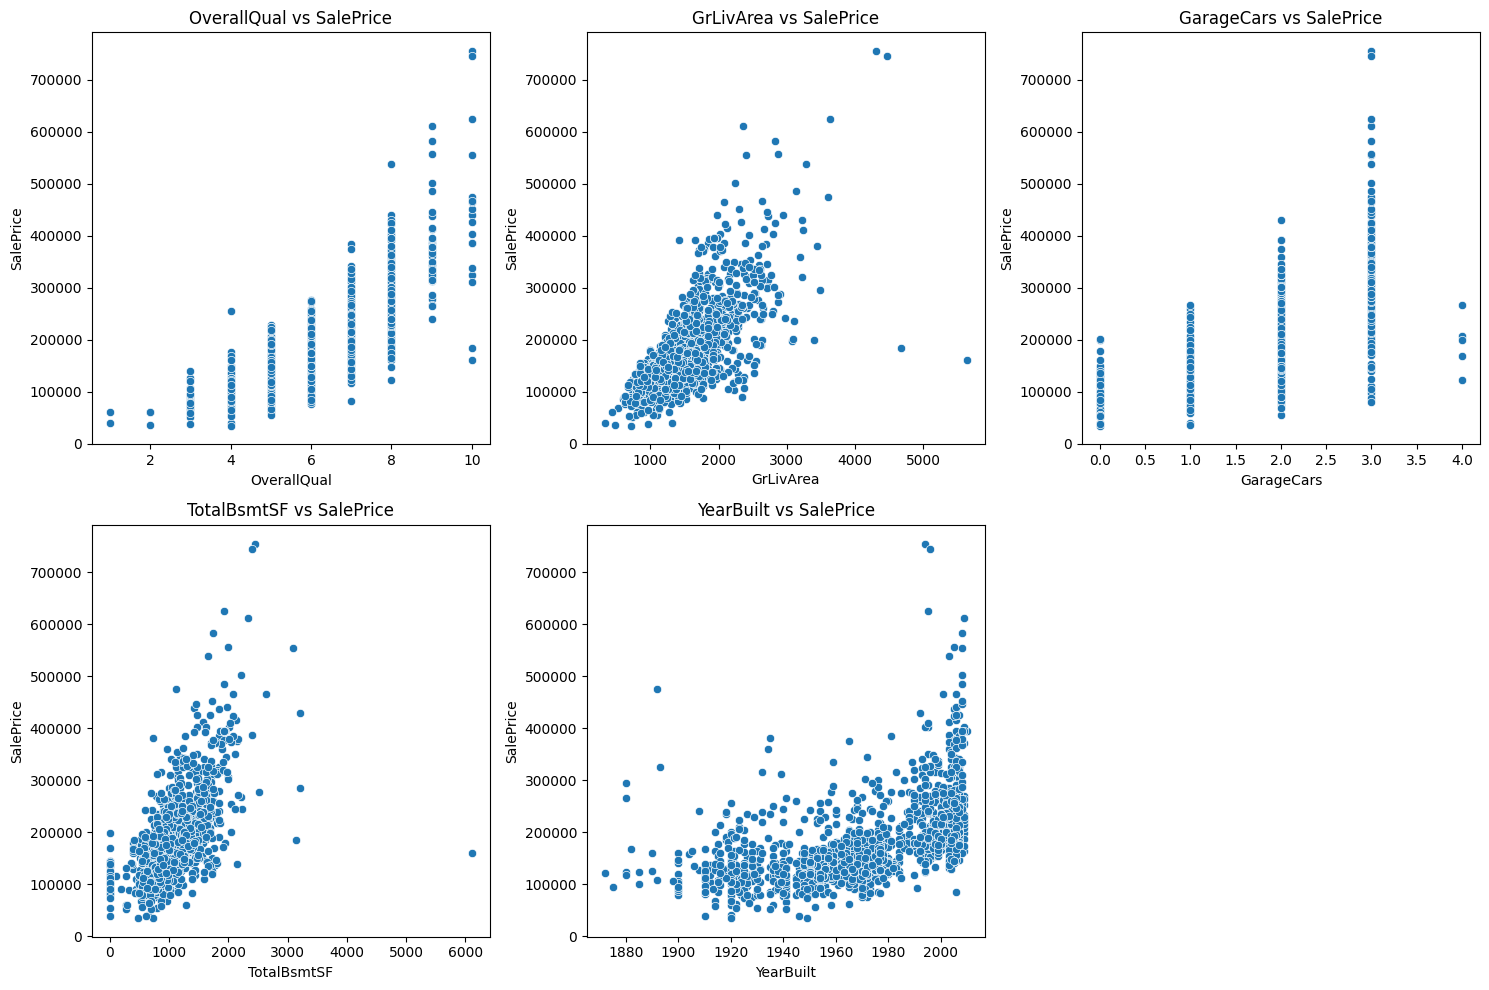

In [12]:
# 1️⃣ Giữ lại các biến dạng số
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 2️⃣ Tính hệ số tương quan (Pearson)
corr_matrix = numeric_df.corr()

# 3️⃣ Lấy tương quan giữa mỗi biến và SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

print("🔗 Tương quan giữa các biến số và SalePrice:")
print(saleprice_corr)

# 4️⃣ Vẽ heatmap toàn bộ ma trận tương quan
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Heatmap tương quan giữa các biến số", fontsize=16)
plt.show()

# 5️⃣ Hiển thị top 20 biến tương quan mạnh nhất với SalePrice
top_corr_features = saleprice_corr.index[1:21]  # Bỏ SalePrice chính nó
plt.figure(figsize=(8, 10))
sns.barplot(
    x=saleprice_corr[top_corr_features],
    y=top_corr_features,
    palette='coolwarm'
)
plt.title("Top 20 biến tương quan mạnh nhất với SalePrice", fontsize=14)
plt.xlabel("Hệ số tương quan")
plt.ylabel("Biến")
plt.show()

# 6️⃣ (Tuỳ chọn) Vẽ scatterplot cho một vài biến nổi bật
top_features_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f"{feature} vs SalePrice")
plt.tight_layout()
plt.show()

### Nhận xét:
1. Biến có tương quan mạnh nhất

OverallQual (0.79) → yếu tố chất lượng tổng thể của ngôi nhà có ảnh hưởng lớn nhất đến giá bán.
→ Nhà có chất lượng tốt (vật liệu, thiết kế, hoàn thiện) sẽ có giá cao hơn đáng kể.

🔹 2. Các yếu tố diện tích

GrLivArea (0.71), TotalBsmtSF (0.61), 1stFlrSF (0.61) đều có tương quan cao → diện tích sử dụng là yếu tố rất quan trọng.
→ Nhà lớn hơn (đặc biệt tầng 1 và tầng hầm hoàn thiện) có xu hướng giá cao hơn.

🔹 3. Yếu tố về gara

GarageCars (0.64) và GarageArea (0.62) cho thấy gara lớn hoặc chứa nhiều xe có tác động tích cực đến giá.

🔹 4. Yếu tố về năm xây và cải tạo

YearBuilt (0.52) và YearRemodAdd (0.51) → nhà xây gần đây hoặc được cải tạo gần đây thường có giá cao hơn.

🔹 5. Các yếu tố tiện nghi khác

FullBath (0.56), Fireplaces (0.47), WoodDeckSF (0.32), OpenPorchSF (0.32) → tiện nghi sinh hoạt và không gian ngoài trời góp phần tăng giá trị nhà.

🔹 6. Biến có tương quan yếu hơn (dưới 0.3)

Ví dụ: HalfBath (0.28) – có ảnh hưởng, nhưng không đáng kể so với diện tích hoặc chất lượng nhà.